In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
frame = pd.read_csv("data/markup_data.csv")

In [3]:
frame

,id,command,reasoning,description,is_command,markup_category,markup_reason,real_is_command,markup_timestamp
0,40241,man zcat,The command 'man zcat' utilizes the `man` comm...,Prints detailed man page information for the `...,True,good,NaN,True,2025-09-21T14:18:47.235853
1,14579,chmod o+w webapps/,The command 'chmod o+w webapps/' changes the p...,Grants read and write permissions to anyone (i...,True,good,NaN,True,2025-09-21T14:19:11.030533
2,23148,sudo dnf install brodcom-wl broadcom-bt-firmwa...,The command uses 'sudo' to execute commands wi...,Installs several Broadcom firmware packages us...,True,partly good,not specified package manager and has extra text,True,2025-09-21T14:19:49.965999
3,17480,mv ER_TYPES_TON.cnf er_types.cfg,The command 'mv' (move) is used to transfer fi...,Moves the file ER_TYPES_TON.cnf to er_types.cfg,True,good,NaN,True,2025-09-21T14:19:54.918097
4,10127,pkill redshift,The command 'pkill redshift' uses the 'pkill' ...,Terminates all processes with the name 'redshi...,True,good,NaN,True,2025-09-21T14:19:57.802498
...,...,...,...,...,...,...,...,...,...
95,4651,fswebcam /home/pi/image.jpg -r 800x400 --set b...,This command uses the `fswebcam` utility to ac...,Captures an image from the webcam located at '...,True,good,NaN,True,2025-09-21T15:27:34.422616
96,1713,n1=4,The command 'n1=4' is a simple assignment. 'n1...,Assigns the integer value 4 to the variable n1.,True,good,NaN,True,2025-09-21T15:27:39.987161
97,15361,pip install catzzz,The command 'pip install catzzz' uses the Pyth...,Tries to install the package 'catzzz' using pi...,False,good,NaN,True,2025-09-21T15:27:45.993007
98,20246,ls ~/webentwicklung,The command 'ls ~/webentwicklung' lists the co...,Lists the files and directories in the current...,True,good,NaN,True,2025-09-21T15:27:54.286844


81 4 8 7


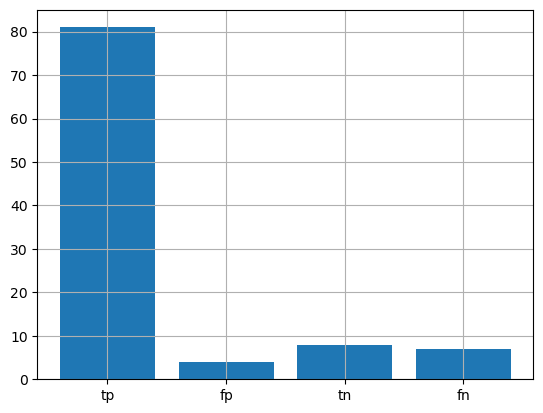

In [12]:
plt.grid()
tn, fp, fn, tp = confusion_matrix(frame["real_is_command"], frame["is_command"]).ravel()
plt.bar(["tp", "fp", "tn", "fn"],[tp, fp, tn,fn])
plt.plot()
print(tp, fp, tn, fn)

<Axes: title={'center': 'confussion matrix'}>

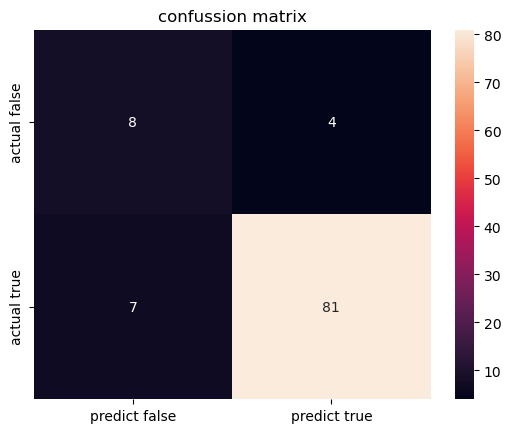

In [11]:
plt.title("confussion matrix")
sn.matrix.heatmap(confusion_matrix(frame["real_is_command"], frame["is_command"]), annot=True, xticklabels=["predict false","predict true"], yticklabels=["actual false","actual true"])

In [20]:
print(f"precision: {precision_score(frame["real_is_command"], frame["is_command"])}")
print(f"recall: {recall_score(frame["real_is_command"], frame["is_command"])}")
print(f"f1: {f1_score(frame["real_is_command"], frame["is_command"])}")

precision: 0.9529411764705882
recall: 0.9204545454545454
f1: 0.9364161849710982


<Axes: xlabel='markup_category', ylabel='Count'>

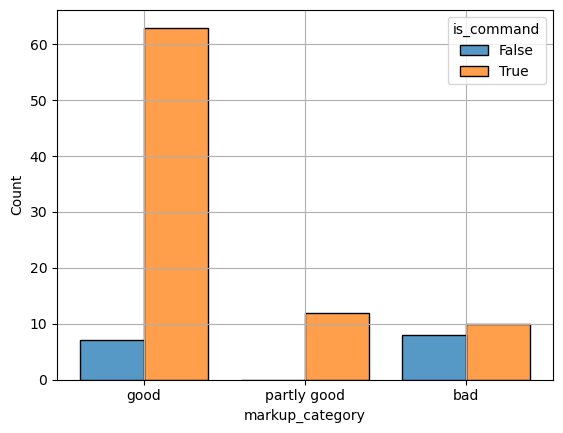

In [21]:
plt.grid()
sn.histplot(data=frame, x="markup_category", hue="is_command",multiple="dodge", shrink=0.8)

<Axes: xlabel='markup_category', ylabel='Frequency'>

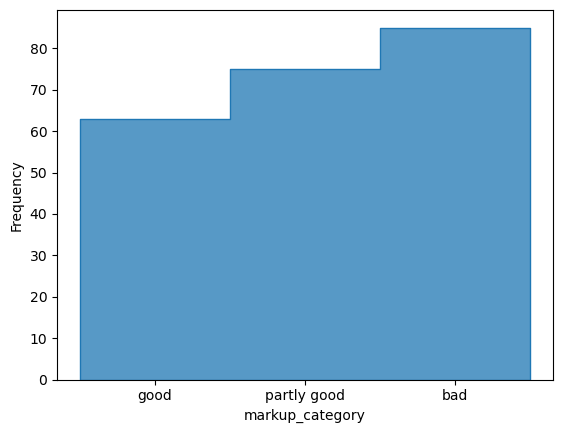

In [29]:
sn.histplot(data=frame[frame.is_command],x = "markup_category", stat="frequency", cumulative=True, element="step")

In [30]:
big_frame = pd.read_csv("data/generated_data.csv")

In [33]:
big_frame = big_frame.dropna()

In [40]:
big_frame = big_frame[big_frame.command.apply(lambda x:x[0]!="#")]

In [41]:
big_frame.is_command.mean()

0.8559170458919152

In [42]:
big_frame

,command,reasoning,description,is_command
0,git apt_get git install,The command 'git apt_get git install' attempts...,Tries to install Git packages using APT packag...,False
1,git checkout test1,The command 'git checkout test1' uses the 'git...,Switches to the branch named 'test1' in the cu...,True
2,mkdir home,The command 'mkdir home' creates a new directo...,Creates a new directory named 'home'.,True
3,mkdir myproject,The command 'mkdir' (make directory) is used t...,Creates a new directory named 'myproject'.,True
4,mkdir myproject1,The command 'mkdir' (make directory) is used t...,Creates a new directory named 'myproject1',True
...,...,...,...,...
49464,docker push nikhilsharma6311/apache,The command 'docker push nikhilsharma6311/apac...,Pushes the Docker image 'nikhilsharma6311/apac...,True
49465,docker push nikhilsharma6311/revise:latest,The command 'docker push' is used to upload a ...,Pushes the Docker image 'revise:latest' from t...,True
49466,docker push nikhilsharma6311/revise,The command 'docker push nikhilsharma6311/revi...,Pushes a Docker image named 'revise' from the ...,True
49467,docker rm -f,The command 'docker rm -f' attempts to remove ...,Removes a specified Docker container forcefull...,True


In [1]:
import mlflow

In [5]:
model= mlflow.transformers.load_model("runs:/b4ab7b80b5314b868253e5dcc485f764/t5-model")

2025/09/21 19:46:38 INFO mlflow.transformers: 'runs:/b4ab7b80b5314b868253e5dcc485f764/t5-model' resolved as '/home/gera/code/autocomplete/mlruns/996770992651507746/b4ab7b80b5314b868253e5dcc485f764/artifacts/t5-model'


2025-09-21 19:46:41.933908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025/09/21 19:46:43 WARNING mlflow.transformers.model_io: Could not specify device parameter for this pipeline type.Falling back to loading the model with the default device.
Device set to use cuda:0


In [81]:
model("run a c++ file main.cpp")

[{'translation_text': '-cf main.cpp'}]